In [1]:
import pandas as pd


In [24]:
data = pd.read_csv("Mastercard_stock_history.csv", index_col='Date', parse_dates=["Date"]).drop(["Dividends", "Stock Splits"], axis=1)

In [52]:

data.loc["2010":"2017","High"]

Date
2010-01-04     24.305701
2010-01-05     24.283114
2010-01-06     24.135339
2010-01-07     23.930004
2010-01-08     24.011009
                 ...    
2017-12-22    148.337015
2017-12-26    148.160803
2017-12-27    148.591520
2017-12-28    149.413846
2017-12-29    149.688048
Name: High, Length: 2013, dtype: float64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2006-05-25 to 2021-10-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3872 non-null   float64
 1   High    3872 non-null   float64
 2   Low     3872 non-null   float64
 3   Close   3872 non-null   float64
 4   Volume  3872 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 181.5 KB


In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.random import set_seed

In [10]:
set_seed(455)

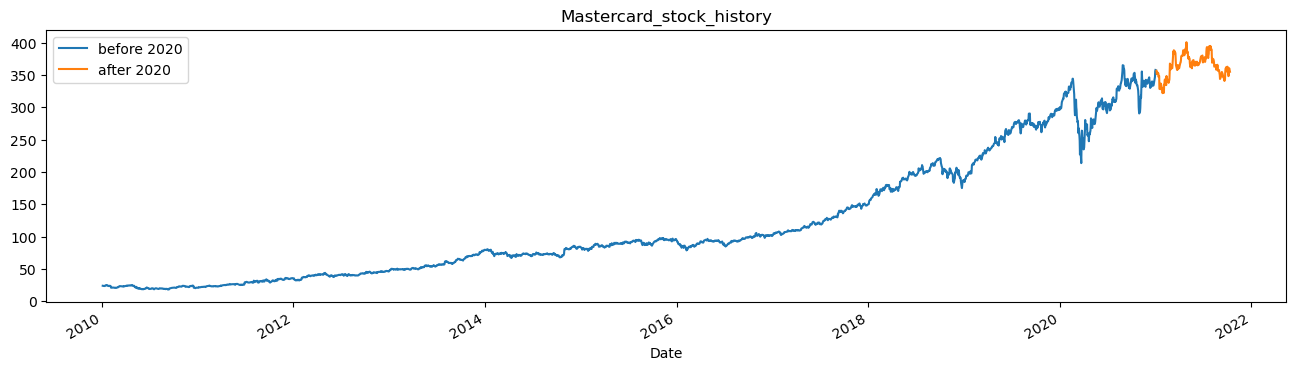

In [32]:
start=2010
end=2020

def plot_stock(data,start,end):
    data.loc[f"{start}":f"{end}","High"].plot(figsize=(16,4),legend=True)
    data.loc[f'{end+1}':,"High"].plot(figsize=(16,4),legend=True)
    plt.legend(["before 2020",'after 2020'])
    plt.title("Mastercard_stock_history")
    plt.show()
plot_stock(data,start,end)    

In [41]:
def data_split(data,start,end):
    train=data.loc[f"{start}":f"{end}","High"].values
    test=data.loc[f'{end+1}':,"High"].values
    return train, test

In [45]:
train,test=data_split(data,start,end)
print("done")

done


In [48]:
sc=MinMaxScaler(feature_range=(0,1))
train=train.reshape(-1,1)
train_scaled=sc.fit_transform(train)

In [53]:
def split_sequence(data,steps):
    x=[]
    y=[]
    for i in range(len(data)):
        end=i+steps
        if end>len(data)-1:
            break 
        else:
            s_x=data[i:end]
            s_y=data[end]
            x.append(s_x)
            y.append(s_y)
    return np.array(x),np.array(y)            

In [55]:
xtrain,ytrain=split_sequence(train_scaled,60)

In [57]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)


In [68]:
model=Sequential()
model.add(LSTM(units=125,activation="tanh",input_shape=(60,1)))
model.add(Dense(units=1))
model.compile(optimizer="RMSprop",loss="mse",metrics=["accuracy"])

In [69]:
model.fit(xtrain,ytrain,epochs=5,batch_size=32)

Epoch 1/5

85/85 [==============================] - 4s 26ms/step - loss: 0.0045 - accuracy: 7.3828e-04
Epoch 2/5
85/85 [==============================] - 2s 26ms/step - loss: 8.8899e-04 - accuracy: 7.3828e-04
Epoch 3/5
85/85 [==============================] - 3s 32ms/step - loss: 6.5135e-04 - accuracy: 7.3828e-04
Epoch 4/5
85/85 [==============================] - 3s 37ms/step - loss: 4.7680e-04 - accuracy: 7.3828e-04
Epoch 5/5
85/85 [==============================] - 3s 35ms/step - loss: 4.6776e-04 - accuracy: 7.3828e-04


data_high=data.loc[:"High"]

In [78]:
data_high=data.loc[:,"High"]
input=data_high[len(data_high)-len(test)-60:].values
input=input.reshape(-1,1)
input=sc.transform(input)
xtest,ytest=split_sequence(input,60)
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)
predict=model.predict(xtest)
predict=sc.inverse_transform(predict)

7/7 [==============================] - 0s 11ms/step


In [79]:
ev=model.evaluate(xtest)

7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [80]:
predict

array([[379.3905 ],
       [382.2989 ],
       [384.28442],
       [385.9722 ],
       [387.1358 ],
       [388.29016],
       [389.0112 ],
       [388.81592],
       [388.5766 ],
       [388.1869 ],
       [385.2192 ],
       [381.86835],
       [379.59735],
       [377.52252],
       [375.5708 ],
       [373.25925],
       [371.23984],
       [368.5371 ],
       [366.77545],
       [364.95084],
       [363.13647],
       [363.17703],
       [363.65247],
       [365.33292],
       [367.394  ],
       [369.15622],
       [370.10944],
       [370.68732],
       [372.8149 ],
       [374.16   ],
       [375.4289 ],
       [376.04068],
       [376.3474 ],
       [376.33496],
       [376.82202],
       [378.58676],
       [382.31265],
       [386.0401 ],
       [388.63174],
       [391.6694 ],
       [394.38724],
       [396.57892],
       [397.8772 ],
       [398.75394],
       [401.8898 ],
       [405.67743],
       [408.97427],
       [412.6271 ],
       [415.23782],
       [417.83588],
